In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline

In [506]:
boston_listings = pd.read_csv('boston_listings.csv')
seattle_listings = pd.read_csv('seattle_listings.csv')



In [507]:
boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210712150755,2021-07-12,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,NaN,NaN,36%,f,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Oven"", ""Washer"", ""Dishwasher"", ""Free street ...",$125.00,32,1125,32,32,1125,1125,32.0,1125.0,NaN,t,17,28,28,112,2021-07-12,20,4,0,2015-10-30,2021-04-30,4.95,5.00,4.95,5.00,4.95,4.85,4.90,NaN,f,1,1,0,0,0.29
1,5506,https://www.airbnb.com/rooms/5506,20210712150755,2021-07-12,**Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,94%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,4,4,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, Massachusetts, United States",Roxbury,NaN,42.32844,-71.09581,Entire guest suite,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Washer"", ""Free street parking"", ""First aid k...",$145.00,3,730,3,3,1125,1125,3.0,1125.0,NaN,t,12,24,46,46,2021-07-12,107,0,0,2011-10-23,2020-05-01,4.77,4.87,4.89,4.95,4.89,4.52,4.78,Approved by the government,f,9,9,0,0,0.90
2,6695,https://www.airbnb.com/rooms/6695,20210712150755,2021-07-12,Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,94%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,4,4,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, Massachusetts, United States",Roxbury,NaN,42.32802,-71.09387,Entire condominium,Entire home/apt,4,NaN,1 bath,NaN,0.0,"[""Oven"", ""Washer"", ""Dishwasher"", ""Free street ...",$169.00,3,730,3,3,730,730,3.0,730.0,NaN,t,8,16,31,109,2021-07-12,115,0,0,2014-08-12,2019-11-02,4.79,4.81,4.86,4.

# Planning

###(I) Data Understanding 
###(II) EDA
###A. Boston vs Seattle

###neibourhood numbers
###accommodates in each neighbourhood
###average price in each neighbourhood, max/min price
### room type, property type
### average price
### reviews/ ratings

##(II) Dealing with missing values

##(III) Dealing with categorical variables


##(IV) Modelling:
###predict price


# (I)Data Understanding

In [508]:
boston_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.043000e+03,3.043000e+03,3.043000e+03,3043.000000,3043.000000,0.0,3043.000000,3043.000000,3043.000000,0.0,2650.000000,2966.000000,3043.000000,3043.000000,3043.000000,3043.000000,3.043000e+03,3.043000e+03,3043.000000,3.043000e+03,0.0,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,3043.000000,2251.000000,2237.000000,2238.000000,2236.000000,2238.000000,2236.00000,2236.000000,3043.000000,3043.000000,3043.000000,3043.000000,2251.000000
mean,3.045123e+07,2.021071e+13,1.130664e+08,140.875452,140.875452,NaN,42.337689,-71.082265,3.097272,NaN,1.457736,1.675657,38.603681,771.810056,39.882353,68.031219,4.235177e+06,4.235188e+06,65.934768,4.235185e+06,NaN,9.529740,22.773250,38.022018,169.844561,38.006901,5.676635,0.760105,4.649325,4.752821,4.713110,4.836409,4.810929,4.75407,4.622800,19.386461,14.712455,4.608610,0.005915,2.103292
std,1.569364e+07,8.048198e-01,1.207260e+08,409.704288,409.704288,NaN,0.026399,0.032712,2.167024,NaN,0.881368,1.373562,48.423164,484.598632,67.172093,147.402596,9.527899e+07,9.527898e+07,142.691289,9.527898e+07,NaN,11.513706,22.790383,34.055884,136.162158,73.469514,15.753169,1.899243,0.559139,0.413316,0.433553,0.372799,0.404414,0.36550,0.432792,31.557507,29.134837,10.807911,0.076695,4.044184
min,3.781000e+03,2.021071e+13,4.804000e+03,0.000000,0.000000,NaN,42.235330,-71.172520,1.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.753528e+07,2.021071e+13,1.618659e+07,1.000000,1.000000,NaN,42.322390,-71.100290,2.000000,NaN,1.000000,1.000000,2.000000,365.000000,2.000000,3.000000,9.990000e+02,1.121500e+03,2.500000,1.000000e+03,NaN,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,4.560000,4.710000,4.630000,4.840000,4.800000,4.67000,4.500000,1.000000,1.000000,0.000000,0.000000,0.260000
50%,3.291541e+07,2.021071e+13,5.208153e+07,5.000000,5.000000,NaN,42.344410,-71.072110,2.000000,NaN,1.000000,1.000000,29.000000,1125.000000,29.000000,29.000000,1.125000e+03,1.125000e+03,29.000000,1.125000e+03,NaN,4.000000,16.000000,34.000000,158.000000,7.000000,0.000000,0.000000,4.800000,4.880000,4.850000,4.950000,4.945000,4.88000,4.730000,5.000000,2.000000,0.000000,0.000000,1.000000
75%,4.555273e+07,2.021071e+13,2.052698e+08,28.000000,28.000000,NaN,42.354465,-71.061080,4.000000,NaN,2.000000,2.000000,91.000000,1125.000000,91.000000,91.000000,1.125000e+03,1.125000e+03,91.000000,1.125000e+03,NaN,19.000000,43.000000,70.000000,313.000000,38.000000,4.000000,0.000000,4.960000,5.000000,5.000000,5.000000,5.000000,5.00000,4.880000,22.000000,14.000000,3.000000,0.000000,2.680000
max,5.095972e+07,2.021071e+13,4.112949e+08,2232.000000,2232.000000,NaN,42.392790,-70.997810,16.000000,NaN,13.000000,22.000000,1000.000000,9999.000000,1000.000000,1000.000000,2.147484e+09,2.147484e+09,1000.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,631.000000,398.000000,30.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,129.000000,129.000000,51.000000,1.000000

In [509]:
boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3043 non-null   int64  
 1   listing_url                                   3043 non-null   object 
 2   scrape_id                                     3043 non-null   int64  
 3   last_scraped                                  3043 non-null   object 
 4   name                                          3043 non-null   object 
 5   description                                   3010 non-null   object 
 6   neighborhood_overview                         2073 non-null   object 
 7   picture_url                                   3043 non-null   object 
 8   host_id                                       3043 non-null   int64  
 9   host_url                                      3043 non-null   o

# (II) EDA 
A .Boston/Seattle EDA

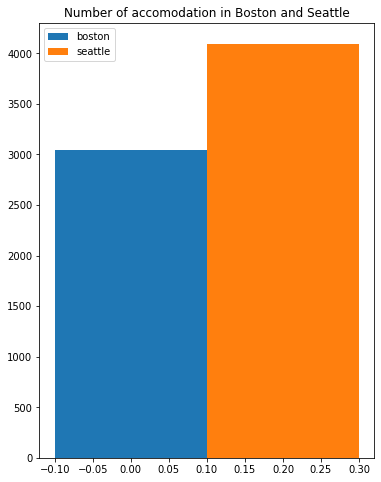

In [510]:
fig, ax = plt.subplots(figsize=(6 , 8))
ax.bar(0,boston_listings.shape[0],width=0.2)
ax.bar(0.2,seattle_listings.shape[0],width=0.2)

plt.title('Number of accomodation in Boston and Seattle')

plt.legend(labels=["boston","seattle"])


Text(0.5, 1.0, 'Neighbourhood of the accomodation in Boston')

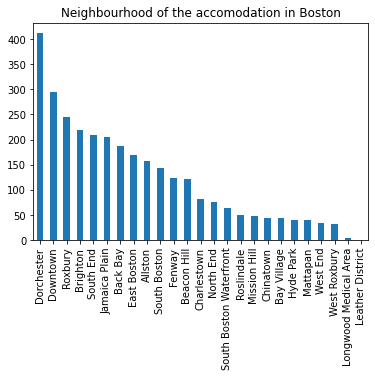

In [511]:
#neighbourhood,neighbourhood_group_cleansed,neighbourhood_cleansed
boston_listings['neighbourhood_cleansed'].value_counts().plot(kind='bar')
plt.title('Neighbourhood of the accomodation in Boston')

Text(0.5, 1.0, 'Neighbourhood of the accomodation in Seattle')

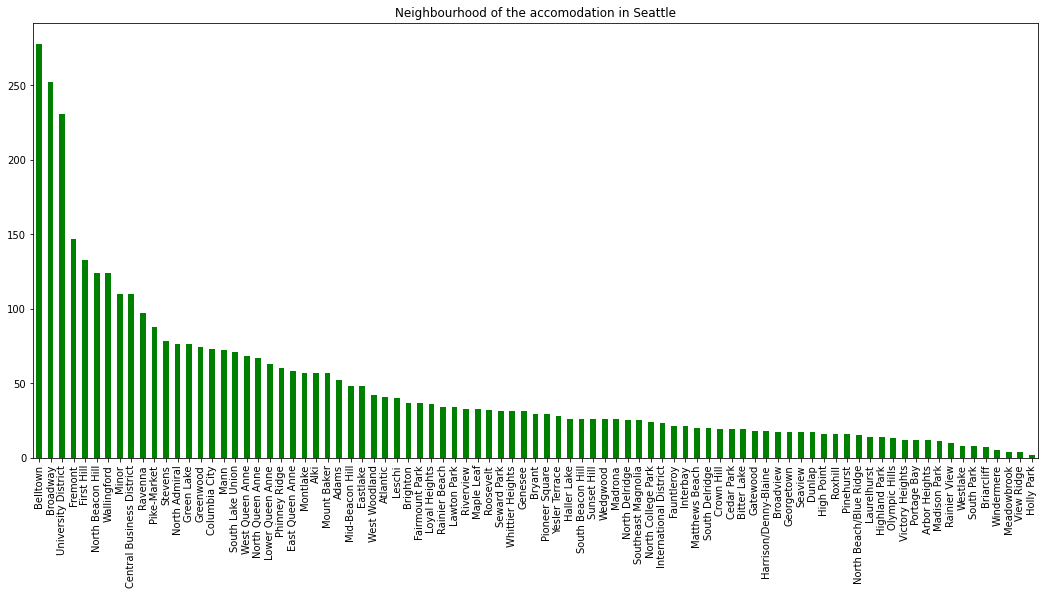

In [512]:
plt.figure(figsize=(18 , 8))
seattle_listings['neighbourhood_cleansed'].value_counts().plot(kind='bar',color='green')
plt.title('Neighbourhood of the accomodation in Seattle')



Text(0.5, 1.0, 'Number of accommodates type in Seattle')

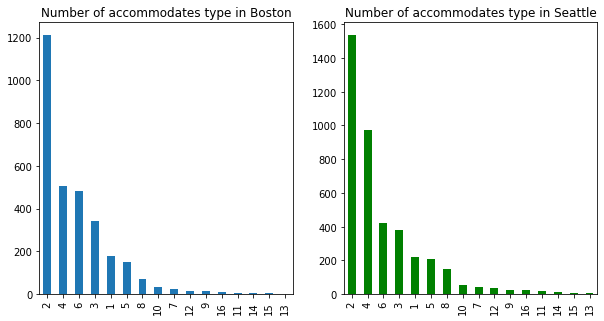

In [513]:
fig, ax =plt.subplots(1,2, sharex=True, figsize=(10,5))

boston_listings['accommodates'].value_counts().plot(kind='bar',ax=ax[0])
seattle_listings['accommodates'].value_counts().plot(kind='bar',color='green',ax=ax[1])
ax[0].set_title('Number of accommodates type in Boston')
ax[1].set_title('Number of accommodates type in Seattle')


Text(0.5, 1.0, 'Room Type in Seattle')

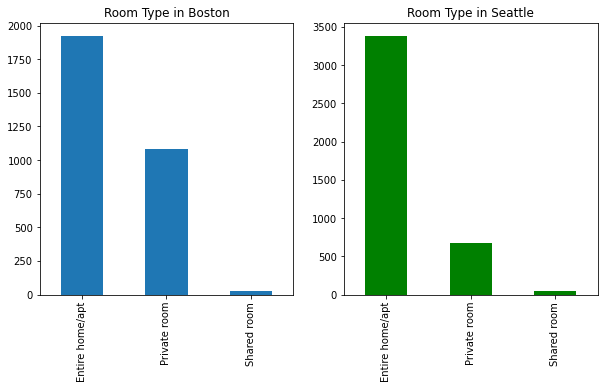

In [514]:
fig, ax =plt.subplots(1,2, sharex=True, figsize=(10,5))

boston_listings['room_type'].value_counts().plot(kind='bar',ax=ax[0])
seattle_listings['room_type'].value_counts().plot(kind='bar',color='green',ax=ax[1])
ax[0].set_title('Room Type in Boston')
ax[1].set_title('Room Type in Seattle')


Text(0.5, 1.0, 'property type in Seattle')

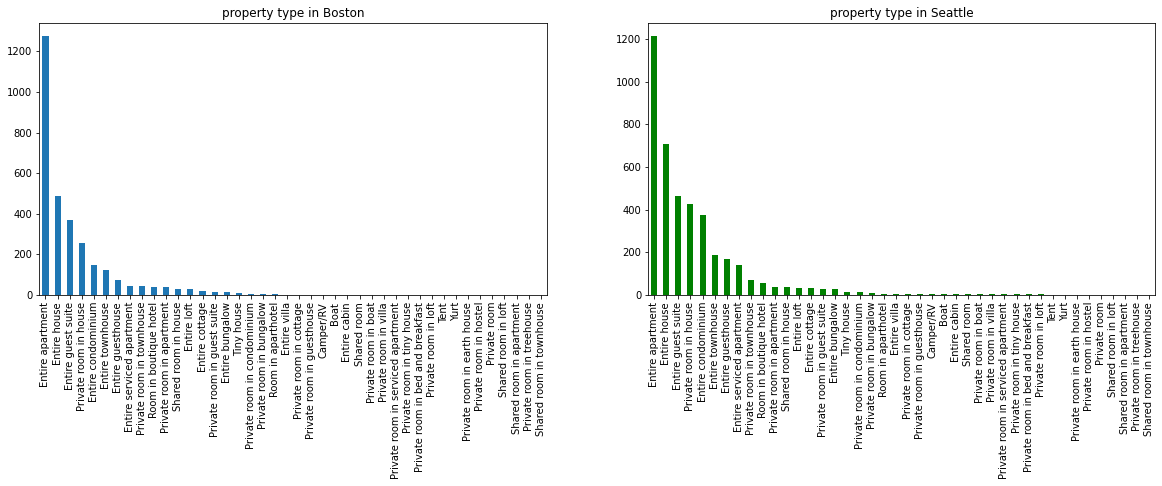

In [515]:
fig, ax =plt.subplots(1,2, sharex=True, figsize=(20,5))

boston_listings['property_type'].value_counts().plot(kind='bar',ax=ax[0])
seattle_listings['property_type'].value_counts().plot(kind='bar',color='green',ax=ax[1])
ax[0].set_title('property type in Boston')
ax[1].set_title('property type in Seattle')


Price understanding

In [516]:
boston_listings['price'].value_counts()

$100.00    72
$120.00    58
$50.00     57
$200.00    55
$150.00    49
           ..
$301.00     1
$410.00     1
$527.00     1
$332.00     1
$842.00     1
Name: price, Length: 460, dtype: int64

In [517]:
#change price to numeric
boston_listings['price']=boston_listings['price'].str[1:].str[:-3]
boston_listings['price']=boston_listings['price'].str.replace(',', '')
boston_listings['price']=pd.to_numeric(boston_listings['price'])
boston_listings['price']

0       125
1       145
2       169
3        76
4       106
       ... 
3038    269
3039    115
3040    532
3041    193
3042    195
Name: price, Length: 3043, dtype: int64

In [518]:
#change price to numeric
seattle_listings['price']=seattle_listings['price'].str[1:].str[:-3]
seattle_listings['price']=seattle_listings['price'].str.replace(',', '')
seattle_listings['price']=pd.to_numeric(seattle_listings['price'])
seattle_listings['price']

0       475
1       102
2        75
3       165
4       125
       ... 
4091    315
4092    318
4093    235
4094     84
4095    222
Name: price, Length: 4096, dtype: int64

In [519]:
boston_listings['price'].max()

10000

In [520]:
seattle_listings['price'].max()

3750

In [521]:
boston_listings['price'].min()

0

In [522]:
seattle_listings['price'].min()

19

In [523]:
boston_listings['price'].mean()

182.78047978968124

In [524]:
seattle_listings['price'].mean()

179.37841796875

[(0.0, 2000.0)]

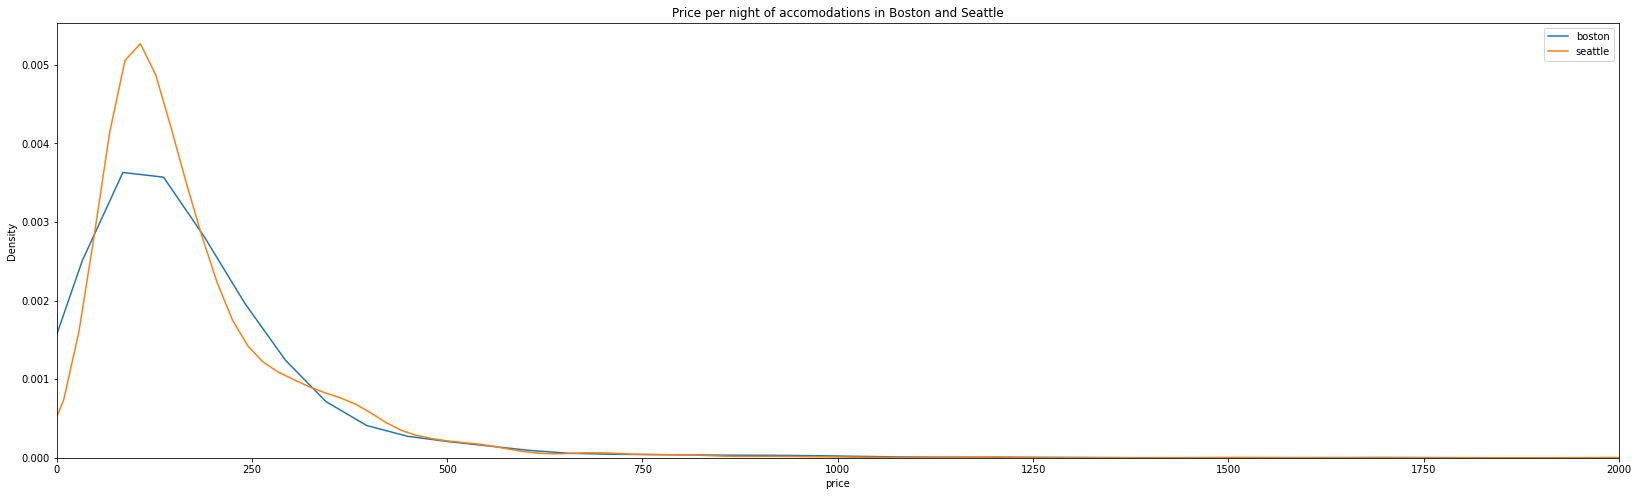

In [525]:

fig, ax = plt.subplots(figsize=(28 , 8))
sns.kdeplot(data=boston_listings['price'],
                ax=ax)
sns.kdeplot(data=seattle_listings['price'],
                ax=ax)

plt.title('Price per night of accomodations in Boston and Seattle')

plt.legend(labels=["boston","seattle"])
ax.set(xlim=(0, 2000))

In [526]:
boston_listings[boston_listings['price']<10]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2010,42065556,https://www.airbnb.com/rooms/42065556,20210712150755,2021-07-12,Inn @ St. Botolph,NaN,NaN,https://a0.muscache.com/pictures/219f5d3d-9750...,107268789,https://www.airbnb.com/users/show/107268789,Inn @,2016-12-14,"Boston, Massachusetts, United States",Enjoy contemporary charm and outstanding value...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72e7b...,https://a0.muscache.com/im/pictures/user/72e7b...,Back Bay,0,0,"['phone', 'reviews']",t,t,NaN,Back Bay,NaN,42.34503,-71.08085,Room in boutique hotel,Hotel room,2,NaN,NaN,NaN,NaN,"[""Concierge"", ""William Roam toiletries"", ""Firs...",0,91,365,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2021-07-12,16,16,1,2020-12-31,2021-06-27,4.50,4.31,4.44,4.31,4.63,4.50,4.44,NaN,f,1,0,0,0,2.47
2011,42065558,https://www.airbnb.com/rooms/42065558,20210712150755,2021-07-12,Boston Fenway Inn,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,308490585,https://www.airbnb.com/users/show/308490585,Boston Fenway Inn,2019-11-10,"Boston, Massachusetts, United States",NaN,within an hour,97%,100%,f,https://a0.muscache.com/im/pictures/user/3c045...,https://a0.muscache.com/im/pictures/user/3c045...,Fenway–Kenmore,7,7,"['email', 'phone', 'work_email']",t,t,NaN,Fenway,NaN,42.34637,-71.08882,Room in hostel,Hotel room,1,NaN,NaN,NaN,NaN,"[""Free wifi"", ""Bed sheets and pillows"", ""Washe...",0,1,365,1,1,365,365,1.0,365.0,NaN,t,0,0,0,0,2021-07-12,92,92,9,2020-07-14,2021-06-27,4.26,4.35,4.10,4.66,4.61,4.71,4.43,NaN,f,4,0,3,0,7.58


In [527]:
seattle_listings[seattle_listings['price']<10]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [528]:
# the price of the room is not 0 according to the url
boston_listings.iloc[2010,39]=778
boston_listings.iloc[2011,39]=350


In [529]:
boston_listings.iloc[2010,39]

778

In [530]:
boston_listings.iloc[2011,39]

350

# (II) EDA
B.Ratings analysis

In [679]:
boston_listings['review_scores_rating'].isnull().sum()

790

In [680]:
seattle_listings['review_scores_rating'].isnull().sum()

761

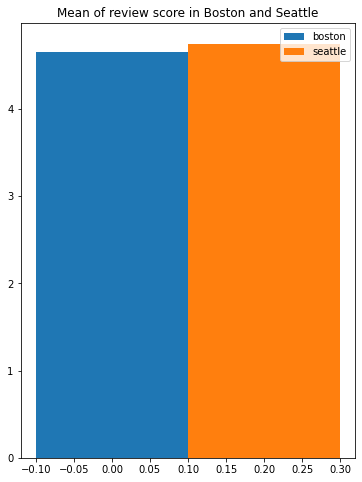

In [681]:
fig, ax = plt.subplots(figsize=(6 , 8))
ax.bar(0,boston_listings['review_scores_rating'].mean(),width=0.2)
ax.bar(0.2,seattle_listings['review_scores_rating'].mean(),width=0.2)

plt.title('Mean of review score in Boston and Seattle')

plt.legend(labels=["boston","seattle"])


In [682]:
boston_reviews_mean =boston_listings['review_scores_rating'].mean()

In [683]:
seattle_reviews_mean = seattle_listings['review_scores_rating'].mean()


In [684]:
#fill null ratings with mean
boston_listings['review_scores_rating'].fillna(boston_reviews_mean)

0       4.95000
1       4.77000
2       4.79000
3       4.78000
4       5.00000
         ...   
3038    4.64931
3039    4.64931
3040    4.64931
3041    4.64931
3042    4.64931
Name: review_scores_rating, Length: 3037, dtype: float64

In [685]:
#fill null ratings with mean
seattle_listings['review_scores_rating'].fillna(seattle_reviews_mean)

0       5.00000
1       4.60000
2       4.66000
3       4.96000
4       4.98000
         ...   
4091    4.74565
4092    4.74565
4093    4.74565
4094    4.74565
4095    4.74565
Name: review_scores_rating, Length: 4094, dtype: float64

Text(0.5, 1.0, 'review scores rating in Boston Seattle')

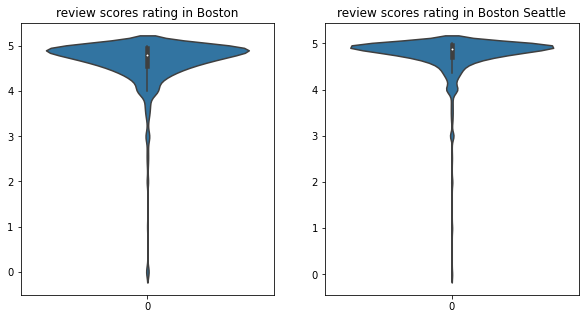

In [686]:

fig, ax =plt.subplots(1,2, sharex=True, figsize=(10,5))
sns.violinplot(data=boston_listings['review_scores_rating'],
                ax=ax[0])
sns.violinplot(data=seattle_listings['review_scores_rating'],
                ax=ax[1])

ax[0].set_title('review scores rating in Boston')
ax[1].set_title('review scores rating in Boston Seattle')


### Exploring relationship between data

Text(0.5, 1.0, 'Relationship between price and ratings in Seattle')

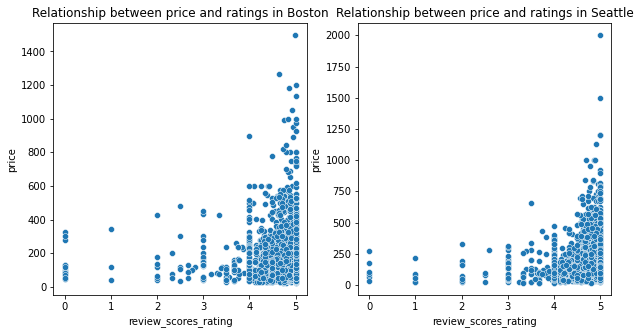

In [687]:
fig, ax =plt.subplots(1,2, sharex=True, figsize=(10,5))

sns.scatterplot(data=boston_listings, y='price', x='review_scores_rating',
                ax=ax[0])
sns.scatterplot(data=seattle_listings, y='price', x='review_scores_rating',
                ax=ax[1])

ax[0].set_title('Relationship between price and ratings in Boston')
ax[1].set_title('Relationship between price and ratings in Seattle')

In [688]:
#remove outliers of price
boston_listings= boston_listings[boston_listings['price']<2000]
seattle_listings= seattle_listings[seattle_listings['price']<2000]

In [689]:
numeric_boston = boston_listings.select_dtypes(include=np.number)
numeric_boston = boston_listings.drop(['id','scrape_id','host_id'],axis=1)


numeric_seattle = seattle_listings.select_dtypes(include=np.number)
numeric_seattle = seattle_listings.drop(['id','scrape_id','host_id'],axis=1)

In [690]:
numeric_boston.columns

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
   

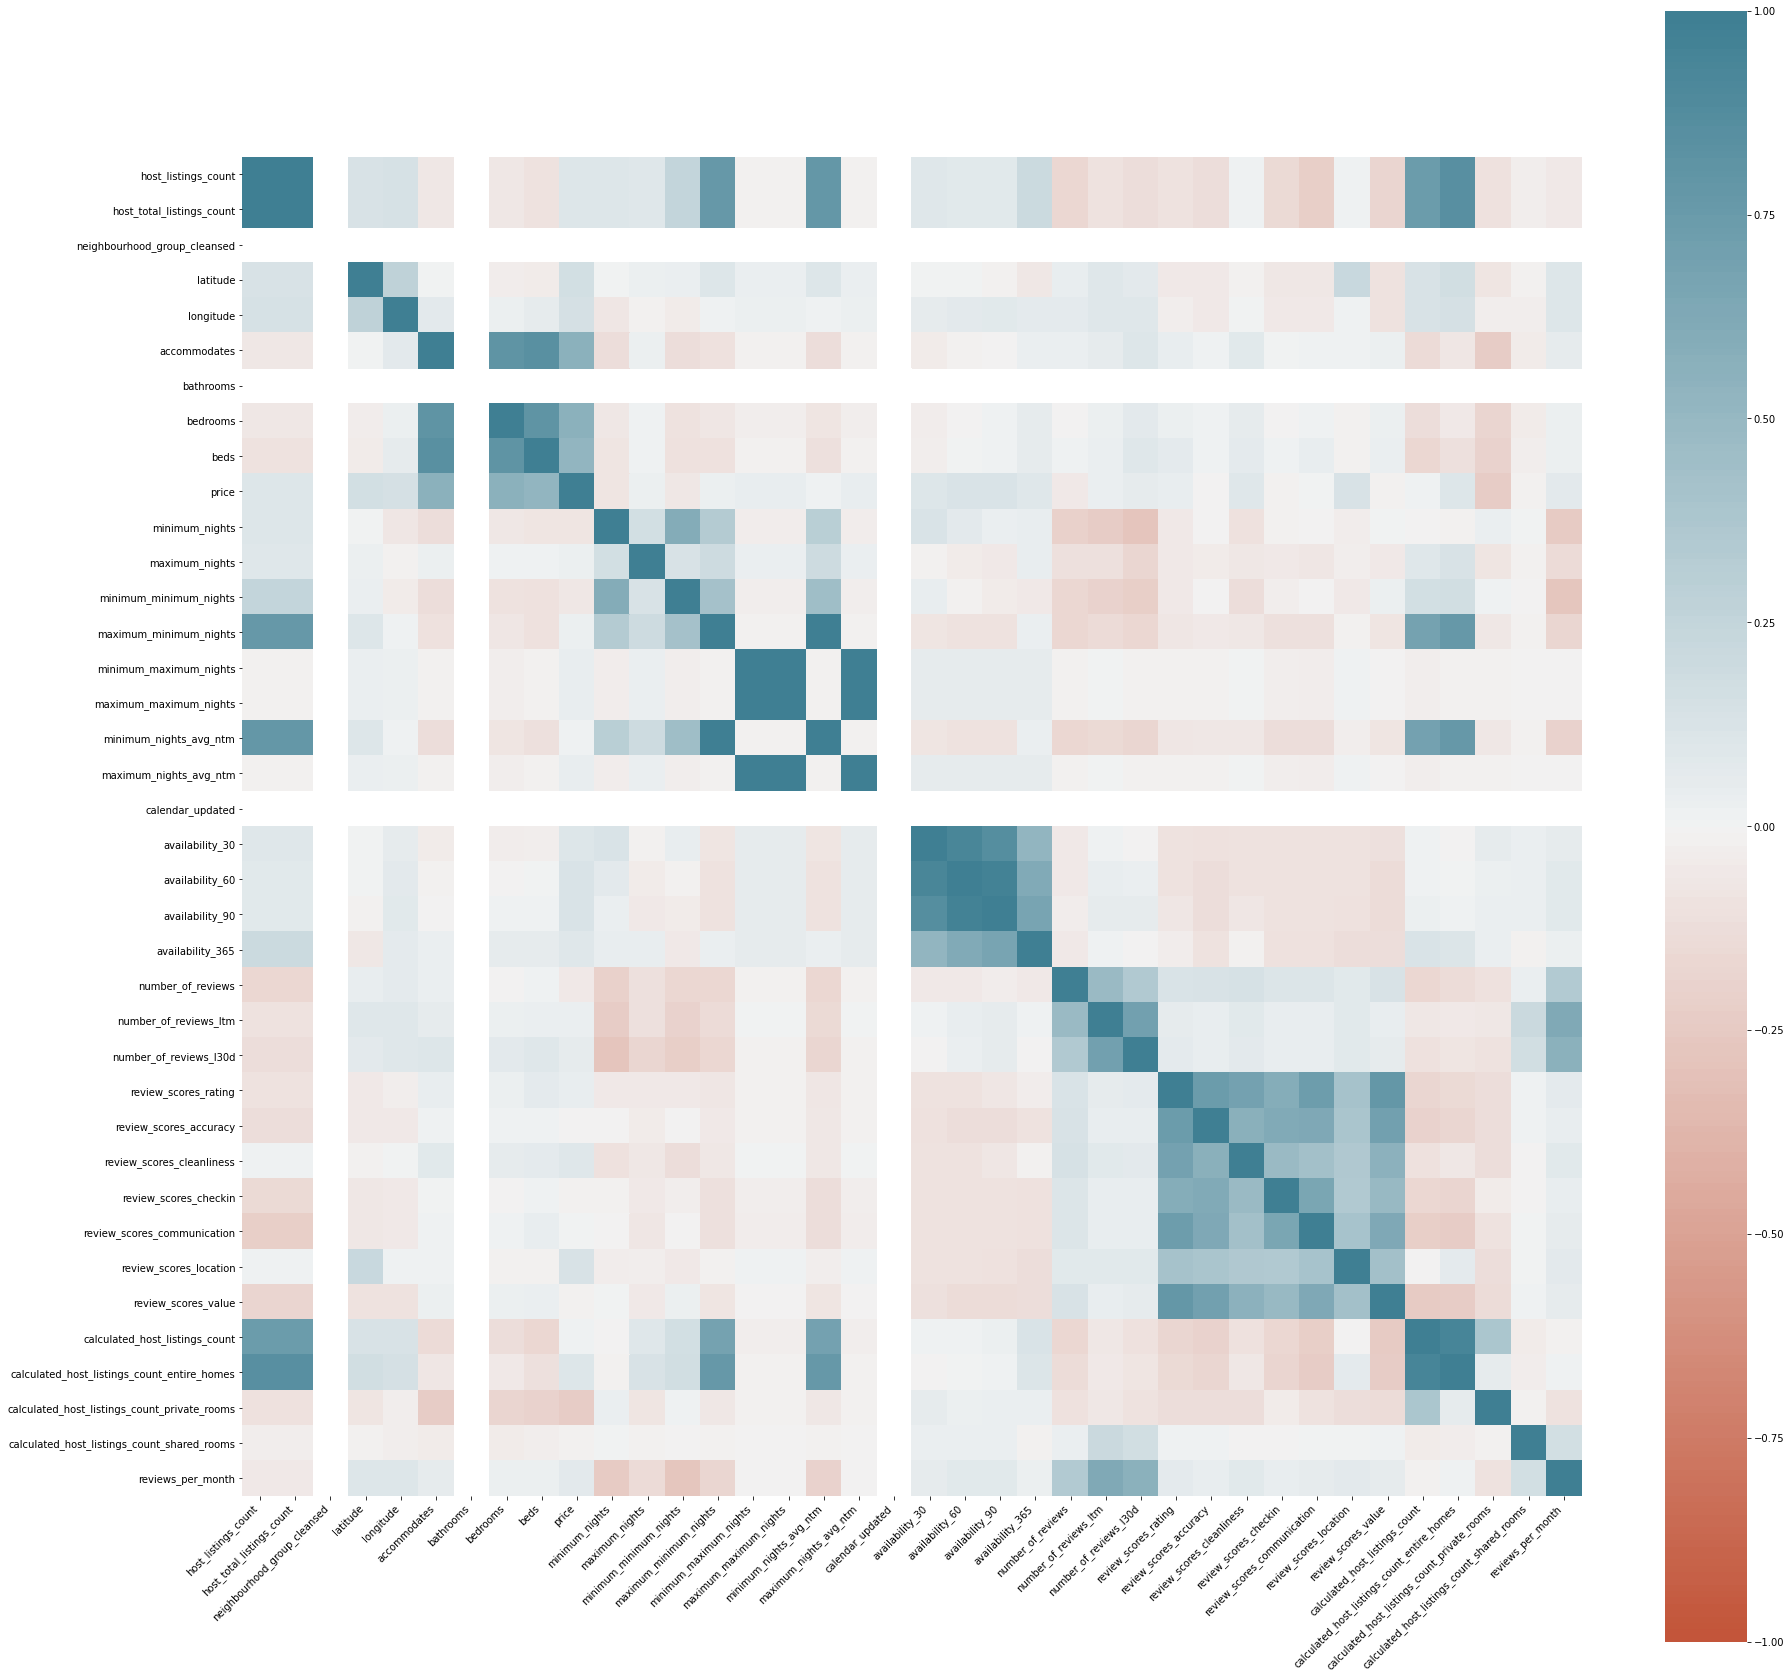

In [691]:
#Correlation of varaibles of Boston
fig, ax = plt.subplots(figsize=(30,30))  
corr = numeric_boston.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

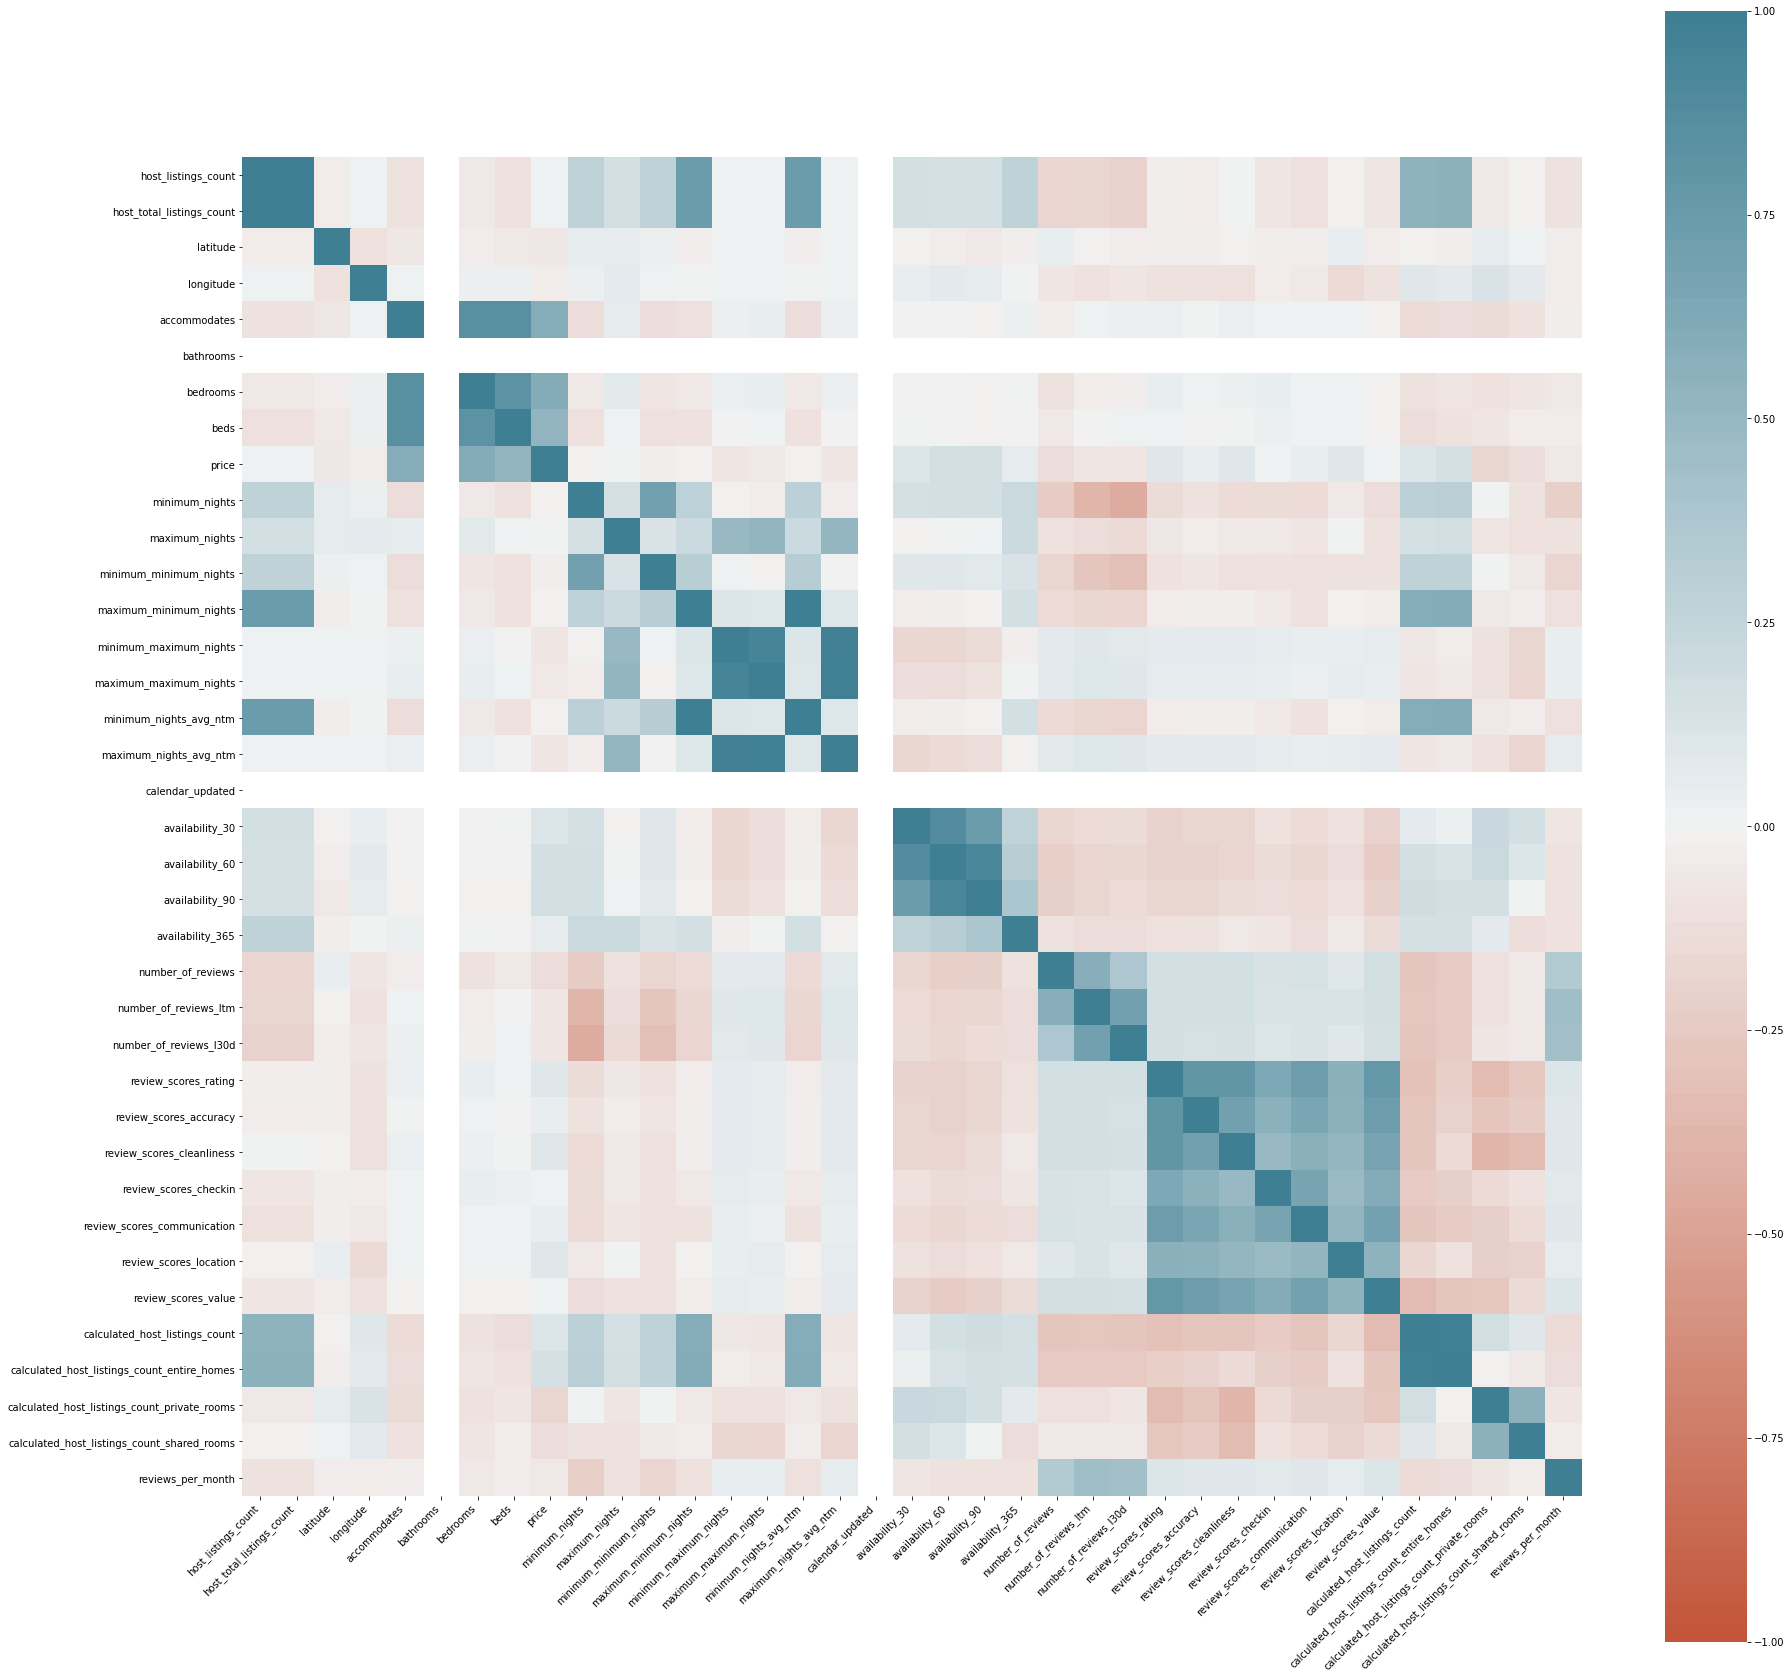

In [692]:
#Correlation of varaibles of Seattle
fig, ax = plt.subplots(figsize=(30,30))  
corr = numeric_seattle.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


## B.Reviews

# (II)Data Cleaning

### Dealing with missing values




In [545]:
boston_listings_clean=boston_listings.copy()
seattle_listings_clean=seattle_listings.copy()

In [546]:
boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3042
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3037 non-null   int64  
 1   listing_url                                   3037 non-null   object 
 2   scrape_id                                     3037 non-null   int64  
 3   last_scraped                                  3037 non-null   object 
 4   name                                          3037 non-null   object 
 5   description                                   3004 non-null   object 
 6   neighborhood_overview                         2068 non-null   object 
 7   picture_url                                   3037 non-null   object 
 8   host_id                                       3037 non-null   int64  
 9   host_url                                      3037 non-null   o

In [547]:
seattle_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4094 entries, 0 to 4095
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4094 non-null   int64  
 1   listing_url                                   4094 non-null   object 
 2   scrape_id                                     4094 non-null   int64  
 3   last_scraped                                  4094 non-null   object 
 4   name                                          4094 non-null   object 
 5   description                                   4085 non-null   object 
 6   neighborhood_overview                         2897 non-null   object 
 7   picture_url                                   4094 non-null   object 
 8   host_id                                       4094 non-null   int64  
 9   host_url                                      4094 non-null   o

In [548]:
boston_listings_clean = boston_listings_clean.dropna(how='all', axis=1)
seattle_listings_clean = seattle_listings_clean.dropna(how='all', axis=1)

In [549]:
seattle_listings['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    783
Downtown               688
Capitol Hill           410
Central Area           306
West Seattle           269
Queen Anne             256
University District    231
Rainier Valley         228
Beacon Hill            200
Ballard                187
Cascade                127
Delridge               124
Northgate               99
Lake City               68
Magnolia                66
Seward Park             31
Interbay                21
Name: neighbourhood_group_cleansed, dtype: int64

In [550]:
seattle_listings['neighbourhood_cleansed'].value_counts()

Belltown               277
Broadway               252
University District    231
Fremont                147
First Hill             133
                      ... 
Briarcliff               7
Windermere               5
Meadowbrook              4
View Ridge               4
Holly Park               2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

In [551]:
seattle_listings['bathrooms']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4091   NaN
4092   NaN
4093   NaN
4094   NaN
4095   NaN
Name: bathrooms, Length: 4094, dtype: float64

In [552]:
boston_listings_clean = boston_listings.drop(['calendar_updated','bathrooms','neighbourhood_group_cleansed'],axis=1)

boston_listings_clean = boston_listings.drop(['calendar_updated','bathrooms','neighbourhood_group_cleansed'],axis=1)


In [553]:
boston_listings_clean['beds'].value_counts()

1.0     1722
2.0      673
3.0      251
0.0      103
4.0      102
5.0       52
6.0       24
7.0       12
9.0        7
8.0        6
10.0       2
12.0       2
11.0       2
16.0       1
18.0       1
Name: beds, dtype: int64

In [554]:
boston_listings_clean['beds'].mode()

0    1.0
dtype: float64

In [555]:
boston_listings_clean['beds'].notnull().sum()

2960

In [556]:
1722/2960

0.5817567567567568

In [557]:
boston_listings_clean['beds'].mean()

1.664864864864865

In [558]:
#fill null value with mode/mean/0

def fill_null_mode(col):

    mode_boston = boston_listings_clean[col].mode()
    boston_listings_clean[col] = boston_listings_clean[col].fillna(mode_boston[0])
    

    mode_seattle = seattle_listings_clean[col].mode()
    seattle_listings_clean[col] = seattle_listings_clean[col].fillna(mode_seattle[0])
    

def fill_null_mean(col):

    mean_boston = boston_listings_clean[col].mean()
    boston_listings_clean[col] = boston_listings_clean[col].fillna(mean_boston)

    mean_seattle = seattle_listings_clean[col].mean()
    seattle_listings_clean[col]=seattle_listings_clean[col].fillna(mean_seattle)

def fill_null_zero(col):
    boston_listings_clean[col] = boston_listings_clean[col].fillna(0)
    seattle_listings_clean[col] = seattle_listings_clean[col].fillna(0)


In [559]:
boston_listings_clean['first_review']

0       2015-10-30
1       2011-10-23
2       2014-08-12
3       2015-03-01
4       2019-03-17
           ...    
3038           NaN
3039           NaN
3040           NaN
3041           NaN
3042           NaN
Name: first_review, Length: 3037, dtype: object

In [560]:
boston_listings_clean[boston_listings_clean['first_review'].isnull()==True]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,13247,https://www.airbnb.com/rooms/13247,20210712150755,2021-07-12,Back Bay studio apartment,Beautiful studio apartment in a great Back Bay...,The Back Bay has so many great shops & restaur...,https://a0.muscache.com/pictures/miso/Hosting-...,51637,https://www.airbnb.com/users/show/51637,Susan,2009-11-05,"Boston, Massachusetts, United States",Real Estate Professional,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/51637/profile...,https://a0.muscache.com/im/users/51637/profile...,Back Bay,0,0,"['email', 'phone']",t,f,"Boston, Massachusetts, United States",Back Bay,42.351640,-71.087520,Entire home/apt,Entire home/apt,1,1 bath,NaN,0.0,"[""Oven"", ""Electric stove"", ""Washer"", ""Dishwash...",75,91,365,91,91,365,365,91.0,365.0,f,0,0,0,0,2021-07-12,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
7,16384,https://www.airbnb.com/rooms/16384,20210712150755,2021-07-12,Small Room in Cambridge Kendall MIT,<b>The space</b><br />No Frills Accommodations...,NaN,https://a0.muscache.com/pictures/506512/5d8f63...,23078,https://www.airbnb.com/users/show/23078,Eric,2009-06-24,"Boston, Massachusetts, United States",Hello! Professional in 30s splitting time mos...,a few days or more,21%,10%,f,https://a0.muscache.com/im/users/23078/profile...,https://a0.muscache.com/im/users/23078/profile...,Beacon Hill,5,5,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Beacon Hill,42.359560,-71.069800,Private room in apartment,Private room,1,1 shared bath,1.0,0.0,"[""Long term stays allowed"", ""Wifi""]",50,91,730,91,91,730,730,91.0,730.0,t,30,60,90,365,2021-07-12,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
67,1077105,https://www.airbnb.com/rooms/1077105,20210712150755,2021-07-12,"Studio Apt. for Rent in South End,",<b>The space</b><br />On restaurant row in Bos...,NaN,https://a0.muscache.com/pictures/16199325/7e1a...,5927277,https://www.airbnb.com/users/show/5927277,J,2013-04-14,US,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5927277/profi...,https://a0.muscache.com/im/users/5927277/profi...,South End,1,1,"['email', 'phone']",t,f,NaN,South End,42.340220,-71.075000,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Long term stays allowed""]",176,91,1125,91,91,1125,1125,91.0,1125.0,f,0,0,0,0,2021-07-12,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
117,2402963,https://www.airbnb.com/rooms/2402963,20210712150755,2021-07-12,1 BR Condo in a PRIME location with FULL ameni...,"Our place is perfect for solo adventurers, bus...",NaN,https://a0.muscache.com/pictures/5fb1ac21-b4c5...,12281296,https://www.airbnb.com/users/show/12281296,Patrick,2014-02-16,"Cambridge, Massachusetts, United States",NaN,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/e15

In [561]:
#get the year for the data column to simplify the handling of date
def date_clean(col):

  boston_listings_clean[col]=boston_listings_clean[col].apply(lambda x:str(x).split("-")[0])
  seattle_listings_clean[col]=seattle_listings_clean[col].apply(lambda x:str(x).split("-")[0])

  boston_listings_clean[col]=pd.to_numeric(boston_listings_clean[col].replace('nan',0))
  seattle_listings_clean[col]=pd.to_numeric(seattle_listings_clean[col].replace('nan',0))

In [562]:

date_clean('first_review')

date_clean('last_review')

In [563]:
boston_listings_clean['first_review'].value_counts()


0       790
2019    469
2021    443
2018    381
2017    280
2020    252
2016    216
2015    115
2014     50
2013     28
2012      9
2011      2
2010      2
Name: first_review, dtype: int64

In [564]:
boston_listings_clean['last_review'].value_counts()

2021    1186
0        790
2020     410
2019     380
2018      95
2017      85
2016      65
2015      23
2014       2
2013       1
Name: last_review, dtype: int64

In [565]:
boston_listings_clean['first_review'].isnull().sum()

0

In [566]:
boston_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3042
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3037 non-null   int64  
 1   listing_url                                   3037 non-null   object 
 2   scrape_id                                     3037 non-null   int64  
 3   last_scraped                                  3037 non-null   object 
 4   name                                          3037 non-null   object 
 5   description                                   3004 non-null   object 
 6   neighborhood_overview                         2068 non-null   object 
 7   picture_url                                   3037 non-null   object 
 8   host_id                                       3037 non-null   int64  
 9   host_url                                      3037 non-null   o

In [567]:

boston_listings_clean[boston_listings_clean['reviews_per_month'].isnull()]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,13247,https://www.airbnb.com/rooms/13247,20210712150755,2021-07-12,Back Bay studio apartment,Beautiful studio apartment in a great Back Bay...,The Back Bay has so many great shops & restaur...,https://a0.muscache.com/pictures/miso/Hosting-...,51637,https://www.airbnb.com/users/show/51637,Susan,2009-11-05,"Boston, Massachusetts, United States",Real Estate Professional,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/51637/profile...,https://a0.muscache.com/im/users/51637/profile...,Back Bay,0,0,"['email', 'phone']",t,f,"Boston, Massachusetts, United States",Back Bay,42.351640,-71.087520,Entire home/apt,Entire home/apt,1,1 bath,NaN,0.0,"[""Oven"", ""Electric stove"", ""Washer"", ""Dishwash...",75,91,365,91,91,365,365,91.0,365.0,f,0,0,0,0,2021-07-12,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
7,16384,https://www.airbnb.com/rooms/16384,20210712150755,2021-07-12,Small Room in Cambridge Kendall MIT,<b>The space</b><br />No Frills Accommodations...,NaN,https://a0.muscache.com/pictures/506512/5d8f63...,23078,https://www.airbnb.com/users/show/23078,Eric,2009-06-24,"Boston, Massachusetts, United States",Hello! Professional in 30s splitting time mos...,a few days or more,21%,10%,f,https://a0.muscache.com/im/users/23078/profile...,https://a0.muscache.com/im/users/23078/profile...,Beacon Hill,5,5,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Beacon Hill,42.359560,-71.069800,Private room in apartment,Private room,1,1 shared bath,1.0,0.0,"[""Long term stays allowed"", ""Wifi""]",50,91,730,91,91,730,730,91.0,730.0,t,30,60,90,365,2021-07-12,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
67,1077105,https://www.airbnb.com/rooms/1077105,20210712150755,2021-07-12,"Studio Apt. for Rent in South End,",<b>The space</b><br />On restaurant row in Bos...,NaN,https://a0.muscache.com/pictures/16199325/7e1a...,5927277,https://www.airbnb.com/users/show/5927277,J,2013-04-14,US,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5927277/profi...,https://a0.muscache.com/im/users/5927277/profi...,South End,1,1,"['email', 'phone']",t,f,NaN,South End,42.340220,-71.075000,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Long term stays allowed""]",176,91,1125,91,91,1125,1125,91.0,1125.0,f,0,0,0,0,2021-07-12,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
117,2402963,https://www.airbnb.com/rooms/2402963,20210712150755,2021-07-12,1 BR Condo in a PRIME location with FULL ameni...,"Our place is perfect for solo adventurers, bus...",NaN,https://a0.muscache.com/pictures/5fb1ac21-b4c5...,12281296,https://www.airbnb.com/users/show/12281296,Patrick,2014-02-16,"Cambridge, Massachusetts, United States",NaN,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/e1568...,https:

In [568]:
#fill null review number per month with 0

fill_null_zero('reviews_per_month')


In [569]:
review_list = ['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

def repalce_wif_mean(df):
  for review in review_list:
    mean = df[review].mean()
    df[review].fillna(mean,inplace=True)
 



In [570]:
#fill null review score with mean
repalce_wif_mean(boston_listings_clean)
repalce_wif_mean(seattle_listings_clean)

In [571]:
boston_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3042
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3037 non-null   int64  
 1   listing_url                                   3037 non-null   object 
 2   scrape_id                                     3037 non-null   int64  
 3   last_scraped                                  3037 non-null   object 
 4   name                                          3037 non-null   object 
 5   description                                   3004 non-null   object 
 6   neighborhood_overview                         2068 non-null   object 
 7   picture_url                                   3037 non-null   object 
 8   host_id                                       3037 non-null   int64  
 9   host_url                                      3037 non-null   o

In [572]:
boston_listings_clean['neighbourhood'].value_counts()

Boston, Massachusetts, United States                                            2000
Dorchester , Massachusetts, United States                                         13
East Boston, Massachusetts, United States                                          7
Dorchester, Massachusetts, United States                                           7
Charlestown, Massachusetts, United States                                          5
Jamaica Plain, Massachusetts, United States                                        4
BOSTON, Massachusetts, United States                                               4
Brighton, Massachusetts, United States                                             3
Boston , Massachusetts, United States                                              2
Brookline, Massachusetts, United States                                            2
Dorchster , Massachusetts, United States                                           2
Roslindale, Massachusetts, United States                         

In [573]:
seattle_listings_clean['neighbourhood'].value_counts()

Seattle, Washington, United States                     2885
Shoreline, Washington, United States                      6
Seattle, Wa, United States                                1
Ballard, Seattle, Washington, United States               1
 Seattle,  WA, United States                              1
Ballard Seattle, Washington, United States                1
West Seattle, Washington, Washington, United States       1
West Seattle, Washington, United States                   1
Name: neighbourhood, dtype: int64

In [574]:
boston_listings_clean['host_response_time'].value_counts()

within an hour        1575
within a few hours     429
within a day           255
a few days or more      79
Name: host_response_time, dtype: int64

In [575]:
seattle_listings_clean['host_response_time'].value_counts()

within an hour        2716
within a few hours     661
within a day           214
a few days or more      68
Name: host_response_time, dtype: int64

In [576]:
boston_listings_clean['host_response_time'].isnull().sum()

699

In [577]:
#fill null host response time with mode
boston_listings_clean['host_response_time'].fillna('within an hour',inplace=True)
seattle_listings_clean['host_response_time'].fillna('within an hour',inplace=True)

In [578]:
boston_listings_clean['host_response_rate'].value_counts()


100%    1562
97%      145
99%      107
90%       79
96%       55
93%       52
0%        44
85%       27
89%       26
60%       21
50%       19
80%       18
63%       17
81%       13
92%       13
95%       12
98%       11
91%       11
94%        8
20%        8
86%        8
83%        7
78%        7
70%        7
68%        7
11%        6
75%        5
84%        5
88%        5
40%        4
57%        4
67%        4
30%        3
31%        3
43%        2
10%        2
55%        2
38%        2
25%        2
17%        1
82%        1
76%        1
33%        1
21%        1
Name: host_response_rate, dtype: int64

In [579]:
seattle_listings_clean['host_response_rate'].value_counts()

100%    2771
90%      169
88%      142
97%       93
99%       59
96%       46
0%        45
50%       33
98%       32
91%       28
94%       24
80%       22
70%       21
87%       20
92%       19
93%       18
67%       15
95%       14
83%       11
60%        9
86%        8
75%        7
57%        7
71%        6
73%        6
33%        5
40%        4
89%        4
30%        3
85%        2
74%        2
36%        2
10%        2
81%        1
24%        1
43%        1
44%        1
38%        1
17%        1
78%        1
20%        1
82%        1
25%        1
Name: host_response_rate, dtype: int64

In [580]:
boston_listings_clean['host_response_rate'] = boston_listings_clean['host_response_rate'].str.replace("%","")
seattle_listings_clean['host_response_rate'] = seattle_listings_clean['host_response_rate'].str.replace("%","")

In [581]:
boston_listings_clean['host_response_rate']=pd.to_numeric(boston_listings_clean['host_response_rate'])
seattle_listings_clean['host_response_rate']=pd.to_numeric(seattle_listings_clean['host_response_rate'])

In [582]:
fill_null_mode('host_response_rate')

In [583]:
seattle_listings_clean['host_response_rate'].value_counts()

100.0    3206
90.0      169
88.0      142
97.0       93
99.0       59
96.0       46
0.0        45
50.0       33
98.0       32
91.0       28
94.0       24
80.0       22
70.0       21
87.0       20
92.0       19
93.0       18
67.0       15
95.0       14
83.0       11
60.0        9
86.0        8
57.0        7
75.0        7
71.0        6
73.0        6
33.0        5
89.0        4
40.0        4
30.0        3
74.0        2
10.0        2
36.0        2
85.0        2
20.0        1
44.0        1
43.0        1
38.0        1
25.0        1
81.0        1
78.0        1
82.0        1
17.0        1
24.0        1
Name: host_response_rate, dtype: int64

In [584]:
boston_listings_clean['host_acceptance_rate'] = boston_listings_clean['host_acceptance_rate'].str.replace("%","")
seattle_listings_clean['host_acceptance_rate'] = seattle_listings_clean['host_acceptance_rate'].str.replace("%","")

In [585]:
boston_listings_clean['host_acceptance_rate']=pd.to_numeric(boston_listings_clean['host_acceptance_rate'])
seattle_listings_clean['host_acceptance_rate']=pd.to_numeric(seattle_listings_clean['host_acceptance_rate'])

In [586]:
fill_null_mean('host_acceptance_rate')


In [587]:
boston_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3042
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3037 non-null   int64  
 1   listing_url                                   3037 non-null   object 
 2   scrape_id                                     3037 non-null   int64  
 3   last_scraped                                  3037 non-null   object 
 4   name                                          3037 non-null   object 
 5   description                                   3004 non-null   object 
 6   neighborhood_overview                         2068 non-null   object 
 7   picture_url                                   3037 non-null   object 
 8   host_id                                       3037 non-null   int64  
 9   host_url                                      3037 non-null   o

In [588]:
seattle_listings_clean['host_about']

0       I welcome guests from all walks of life and ev...
1       I am a therapist/innkeeper.I know my city well...
2       I am a visual artist who is  the  director of ...
3       The Sweet Orange reflects my passion and zest ...
4       The Sweet Orange reflects my passion and zest ...
                              ...                        
4091                                                  NaN
4092    Why take a chance picking & choosing between s...
4093                                                  NaN
4094    I'm living in Seattle as an architect, but am ...
4095                                                  NaN
Name: host_about, Length: 4094, dtype: object

In [589]:
#count number of words of the text
boston_listings_clean['host_about'] = boston_listings_clean['host_about'].str.split().str.len()
seattle_listings_clean['host_about'] = seattle_listings_clean['host_about'].str.split().str.len()

In [590]:
boston_listings_clean[boston_listings_clean['host_about'].isnull()]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,10813,https://www.airbnb.com/rooms/10813,20210712150755,2021-07-12,"Back Bay Apt-blocks to subway, Newbury St, The...",Stunning Back Bay furnished studio apartment. ...,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,US,NaN,within a few hours,99.0,14.000000,t,https://a0.muscache.com/im/pictures/user/13444...,https://a0.muscache.com/im/pictures/user/13444...,Back Bay,16,16,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Boston, Massachusetts, United States",Back Bay,42.350610,-71.087870,Entire apartment,Entire home/apt,3,1 bath,NaN,1.0,"[""Dishwasher"", ""Fire extinguisher"", ""Wifi"", ""S...",106,29,1125,29,29,1125,1125,29.0,1125.0,t,0,26,56,331,2021-07-12,5,1,0,2019,2020,5.00000,5.000000,4.750000,5.000000,5.0000,5.000000,4.750000,NaN,f,11,11,0,0,0.18
5,10986,https://www.airbnb.com/rooms/10986,20210712150755,2021-07-12,North End (Waterfront area) CLOSE TO MGH & SU...,Chic furnished studio apartment is located on ...,NaN,https://a0.muscache.com/pictures/46994/567b606...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,US,NaN,within a few hours,99.0,14.000000,t,https://a0.muscache.com/im/pictures/user/13444...,https://a0.muscache.com/im/pictures/user/13444...,Back Bay,16,16,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,North End,42.363770,-71.052060,Entire condominium,Entire home/apt,2,1 bath,NaN,1.0,"[""Lockbox"", ""Dishwasher"", ""Fire extinguisher"",...",100,29,1125,29,29,1125,1125,29.0,1125.0,t,7,9,39,314,2021-07-12,2,0,0,2016,2016,0.00000,4.752924,4.713183,4.836366,4.8109,4.753911,4.622988,NaN,f,11,11,0,0,0.03
40,611081,https://www.airbnb.com/rooms/611081,20210712150755,2021-07-12,Houseboat in Boston Harbor,Staying on the houseboat is a unique and very...,"The location is quiet, residential in nature. ...",https://a0.muscache.com/pictures/7739101/2b09a...,3029783,https://www.airbnb.com/users/show/3029783,Deborah,2012-07-23,US,NaN,within an hour,100.0,85.892144,t,https://a0.muscache.com/im/pictures/user/86735...,https://a0.muscache.com/im/pictures/user/86735...,Charlestown,13,13,"['email', 'phone', 'reviews']",t,f,"Boston, Massachusetts, United States",Charlestown,42.375790,-71.049810,Boat,Entire home/apt,6,1 bath,1.0,4.0,"[""Extra pillows and blankets"", ""Security camer...",268,2,1125,2,2,1125,1125,2.0,1125.0,t,8,25,46,318,2021-07-12,42,8,0,2018,2021,4.69000,4.740000,4.740000,4.740000,4.7900,4.600000,4.500000,STR-416892,t,3,3,0,0,1.17
67,1077105,https://www.airbnb.com/rooms/1077105,20210712150755,2021-07-12,"Studio Apt. for Rent in South End,",<b>The space</b><br />On restaurant row in Bos...,NaN,https://a0.muscache.com/pictures

In [591]:
fill_null_zero('host_about')

In [592]:
#count number of words of the text
boston_listings_clean['description'] = boston_listings_clean['description'].str.split().str.len()
seattle_listings_clean['description'] = seattle_listings_clean['description'].str.split().str.len()

In [593]:
boston_listings_clean['description'] .isnull().sum()

33

In [594]:
boston_listings_clean[boston_listings_clean['description'] .isnull()==True]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1406,29860624,https://www.airbnb.com/rooms/29860624,20210712150755,2021-07-12,Roxbury living,NaN,NaN,https://a0.muscache.com/pictures/1af843f6-3ae0...,13107750,https://www.airbnb.com/users/show/13107750,Gavin,2014-03-13,"Boston, Massachusetts, United States",7.0,within an hour,100.0,85.892144,f,https://a0.muscache.com/im/pictures/user/de8a1...,https://a0.muscache.com/im/pictures/user/de8a1...,NaN,1,1,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,NaN,Roxbury,42.32243,-71.08024,Private room in condominium,Private room,1,1 shared bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Air conditioning"", ""I...",70,91,1125,91,91,1125,1125,91.0,1125.0,t,0,0,0,0,2021-07-12,0,0,0,0,0,4.64931,4.752924,4.713183,4.836366,4.8109,4.753911,4.622988,NaN,t,1,0,1,0,0.00
1443,30964172,https://www.airbnb.com/rooms/30964172,20210712150755,2021-07-12,Spacious duplex in historic Charlestown w/ par...,NaN,NaN,https://a0.muscache.com/pictures/0a56f7c1-f0c9...,12538925,https://www.airbnb.com/users/show/12538925,Teona,2014-02-24,"New York, New York, United States",43.0,within an hour,100.0,85.892144,f,https://a0.muscache.com/im/pictures/user/d0026...,https://a0.muscache.com/im/pictures/user/d0026...,Nolita,2,2,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,f,NaN,Charlestown,42.38169,-71.06442,Entire condominium,Entire home/apt,6,1.5 baths,1.0,1.0,"[""Hot water"", ""Washer"", ""Air conditioning"", ""S...",102,91,1125,91,91,1125,1125,91.0,1125.0,t,0,0,0,0,2021-07-12,0,0,0,0,0,4.64931,4.752924,4.713183,4.836366,4.8109,4.753911,4.622988,NaN,f,1,1,0,0,0.00
1448,31140376,https://www.airbnb.com/rooms/31140376,20210712150755,2021-07-12,Spacious Room 5 min walk to T 10 mins to BC,NaN,Its very safe neighbourhood and close to every...,https://a0.muscache.com/pictures/24cb7b4c-fe6d...,200455160,https://www.airbnb.com/users/show/200455160,Mo,2018-07-06,"Boston, Massachusetts, United States",0.0,within an hour,100.0,85.892144,f,https://a0.muscache.com/im/pictures/user/a5bfd...,https://a0.muscache.com/im/pictures/user/a5bfd...,NaN,5,5,"['email', 'phone', 'offline_government_id', 's...",t,t,"Boston, Massachusetts, United States",Brighton,42.34383,-71.15546,Private room in apartment,Private room,2,1 shared bath,1.0,1.0,"[""Oven"", ""Dishwasher"", ""Free street parking"", ...",100,91,1125,91,91,1125,1125,91.0,1125.0,t,30,60,90,180,2021-07-12,3,0,0,2019,2019,4.00000,5.000000,3.000000,5.000000,5.0000,5.000000,4.000000,NaN,f,5,0,5,0,0.11
1492,32366109,https://www.airbnb.com/rooms/32366109,20210712150755,2021-07-12,Wonderful apartment located in the heart of Bo...,NaN,NaN,https://a0.muscache.com/pictures/2b481b92-e2d2...,243028338,https://www.airbnb.com/users/show/243028338,Kondy,2019-02-13,US,0.0,within an hour,100.0,85.892144,f

In [595]:
#count number of words of the text columns
boston_listings_clean['name'] = boston_listings_clean['name'].str.split().str.len()
seattle_listings_clean['name'] = seattle_listings_clean['name'].str.split().str.len()

In [596]:
fill_null_zero('description')




In [597]:
boston_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3042
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3037 non-null   int64  
 1   listing_url                                   3037 non-null   object 
 2   scrape_id                                     3037 non-null   int64  
 3   last_scraped                                  3037 non-null   object 
 4   name                                          3037 non-null   int64  
 5   description                                   3037 non-null   float64
 6   neighborhood_overview                         2068 non-null   object 
 7   picture_url                                   3037 non-null   object 
 8   host_id                                       3037 non-null   int64  
 9   host_url                                      3037 non-null   o

In [598]:
boston_listings_clean['neighborhood_overview'] = boston_listings_clean['neighborhood_overview'].str.split().str.len()
seattle_listings_clean['neighborhood_overview'] = seattle_listings_clean['neighborhood_overview'].str.split().str.len()

fill_null_zero('neighborhood_overview')

In [599]:
boston_listings_clean['bedrooms'].value_counts()

1.0    1885
2.0     470
3.0     181
4.0      79
5.0      22
6.0       5
7.0       2
Name: bedrooms, dtype: int64

In [600]:
boston_listings_clean['bathrooms_text'].value_counts()

1 bath               1585
1 shared bath         512
2 baths               293
2 shared baths        161
1 private bath        161
1.5 baths             103
1.5 shared baths       89
2.5 baths              40
3 baths                28
2.5 shared baths       14
3.5 baths              13
3 shared baths         12
6 shared baths          7
0 shared baths          5
5 baths                 3
4.5 baths               2
4 baths                 1
3.5 shared baths        1
0 baths                 1
Private half-bath       1
Shared half-bath        1
Half-bath               1
Name: bathrooms_text, dtype: int64

In [601]:
boston_listings_clean['bedrooms'].value_counts()


1.0    1885
2.0     470
3.0     181
4.0      79
5.0      22
6.0       5
7.0       2
Name: bedrooms, dtype: int64

In [602]:
boston_listings_clean['beds'].value_counts()

1.0     1722
2.0      673
3.0      251
0.0      103
4.0      102
5.0       52
6.0       24
7.0       12
9.0        7
8.0        6
10.0       2
12.0       2
11.0       2
16.0       1
18.0       1
Name: beds, dtype: int64

In [603]:
fill_null_mode('beds')
fill_null_mode('bedrooms')

In [604]:
boston_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3042
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3037 non-null   int64  
 1   listing_url                                   3037 non-null   object 
 2   scrape_id                                     3037 non-null   int64  
 3   last_scraped                                  3037 non-null   object 
 4   name                                          3037 non-null   int64  
 5   description                                   3037 non-null   float64
 6   neighborhood_overview                         3037 non-null   float64
 7   picture_url                                   3037 non-null   object 
 8   host_id                                       3037 non-null   int64  
 9   host_url                                      3037 non-null   o

In [605]:
boston_listings_clean['bedrooms'] = boston_listings_clean['bedrooms'].astype(int)
seattle_listings_clean['bedrooms'] = seattle_listings_clean['bedrooms'].astype(int)

boston_listings_clean['beds'] = boston_listings_clean['beds'].astype(int)
seattle_listings_clean['beds'] = seattle_listings_clean['beds'].astype(int)

In [606]:
boston_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3042
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3037 non-null   int64  
 1   listing_url                                   3037 non-null   object 
 2   scrape_id                                     3037 non-null   int64  
 3   last_scraped                                  3037 non-null   object 
 4   name                                          3037 non-null   int64  
 5   description                                   3037 non-null   float64
 6   neighborhood_overview                         3037 non-null   float64
 7   picture_url                                   3037 non-null   object 
 8   host_id                                       3037 non-null   int64  
 9   host_url                                      3037 non-null   o

In [607]:
seattle_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4094 entries, 0 to 4095
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4094 non-null   int64  
 1   listing_url                                   4094 non-null   object 
 2   scrape_id                                     4094 non-null   int64  
 3   last_scraped                                  4094 non-null   object 
 4   name                                          4094 non-null   int64  
 5   description                                   4094 non-null   float64
 6   neighborhood_overview                         4094 non-null   float64
 7   picture_url                                   4094 non-null   object 
 8   host_id                                       4094 non-null   int64  
 9   host_url                                      4094 non-null   o

In [608]:
boston_listings_clean = boston_listings_clean.drop( ['host_neighbourhood','host_location'],axis=1)
seattle_listings_clean = seattle_listings_clean.drop( ['host_neighbourhood','host_location'],axis=1)

In [609]:
boston_listings_clean['license'] = boston_listings_clean['license'].apply(lambda x: 'No' if pd.isnull(x) else 'Yes')
seattle_listings_clean['license'] = seattle_listings_clean['license'].apply(lambda x: 'No' if pd.isnull(x) else 'Yes')

In [610]:

boston_listings_clean['license'].value_counts()

Yes    1688
No     1349
Name: license, dtype: int64

In [611]:
seattle_listings_clean['license'].value_counts()

Yes    2977
No     1117
Name: license, dtype: int64

In [612]:
#drop unnecessary varaibles for modelling
boston_listings_clean = boston_listings_clean.drop(['last_scraped','id','scrape_id','listing_url','picture_url','host_id','host_url','host_name','calendar_last_scraped','bathrooms_text','host_thumbnail_url','host_picture_url','amenities','host_since'],axis=1)
seattle_listings_clean = seattle_listings_clean.drop(['last_scraped','id','scrape_id','listing_url','picture_url','host_id','host_url','host_name','calendar_last_scraped','bathrooms_text','host_thumbnail_url','host_picture_url','amenities','host_since'],axis=1)

In [613]:
boston_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3042
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          3037 non-null   int64  
 1   description                                   3037 non-null   float64
 2   neighborhood_overview                         3037 non-null   float64
 3   host_about                                    3037 non-null   float64
 4   host_response_time                            3037 non-null   object 
 5   host_response_rate                            3037 non-null   float64
 6   host_acceptance_rate                          3037 non-null   float64
 7   host_is_superhost                             3037 non-null   object 
 8   host_listings_count                           3037 non-null   int64  
 9   host_total_listings_count                     3037 non-null   i

In [614]:
seattle_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4094 entries, 0 to 4095
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4094 non-null   int64  
 1   description                                   4094 non-null   float64
 2   neighborhood_overview                         4094 non-null   float64
 3   host_about                                    4094 non-null   float64
 4   host_response_time                            4094 non-null   object 
 5   host_response_rate                            4094 non-null   float64
 6   host_acceptance_rate                          4094 non-null   float64
 7   host_is_superhost                             4094 non-null   object 
 8   host_listings_count                           4094 non-null   int64  
 9   host_total_listings_count                     4094 non-null   i

#(III) Dealing with Categorical variables

In [643]:
def create_dummy_df(df, cat_cols, dummy_na):
   
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df
    

 

In [644]:
df_boston  = boston_listings_clean
df_seattle  = seattle_listings_clean

In [645]:

cat_df = df_boston.select_dtypes(include=['object']).copy()
cat_cols_lst = cat_df.columns


df_boston_new = create_dummy_df(df_boston, cat_cols_lst, dummy_na=False) #Use your newly created function


print(df_boston_new .shape)

(3037, 297)


In [646]:
cat_df = df_seattle.select_dtypes(include=['object']).copy()
cat_cols_lst = cat_df.columns


df_seattle_new = create_dummy_df(df_seattle, cat_cols_lst, dummy_na=False) #Use your newly created function


print(df_seattle_new.shape)

(4094, 408)


In [647]:
df_boston_new.head()

,name,description,neighborhood_overview,host_about,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,...,property_type_Casa particular (Cuba),property_type_Castle,property_type_Entire apartment,property_type_Entire bed and breakfast,property_type_Entire condominium,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home/apt,property_type_Entire house,property_type_Entire loft,property_type_Entire place,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Houseboat,property_type_Private room in apartment,property_type_Private room in bed and breakfast,property_type_Private room in bungalow,property_type_Private room in condominium,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in house,property_type_Private room in loft,property_type_Private room in townhouse,property_type_Private room in villa,property_type_Room in bed and breakfast,property_type_Room in boutique hotel,property_type_Room in hostel,property_type_Room in hotel,property_type_Shared room in apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in boutique hotel,property_type_Shared room in condominium,property_type_Shared room in house,property_type_Shared room in townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_t,license_Yes,instant_bookable_t
0,3,165.0,53.0,53.0,100.0,36.0,5,5,42.36413,-71.02991,2,1,0,125,32,1125,32,32,1125,1125,32.0,1125.0,17,28,28,112,20,4,0,2015,2021,4.95,5.00,4.95,5.00,4.95,4.85,4.90,1,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6,160.0,15.0,4.0,100.0,94.0,4,4,42.32844,-71.09581,2,1,1,145,3,730,3,3,1125,1125,3.0,1125.0,12,24,46,46,107,0,0,2011,2020,4.77,4.87,4.89,4.95,4.89,4.52,4.78,9,9,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,4,151.0,13.0,4.0,100.0,94.0,4,4,42.32802,-71.09387,4,1,0,169,3,730,3,3,730,730,3.0,730.0,8,16,31,109,115,0,0,2014,2019,4.79,4.81,4.86,4.90,4.95,4.48,4.70,9,9,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,5,148.0,23.0,157.0,100.0,66.0,6,6,42.35906,-71.06271,2,1,1,76,91,365,91,91,365,365,91.0,365.0,0,0,0,262,32,0,0,2015,2020,4.78,4.78,4.52,4.96,4.92,4.96,4.43,5,5,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9,155.0,159.0,0.0,99.0,14.0,16,16,42.35061,-71.08787,3,1,1,106,29,1125,29,29,1125,1125,29.0,1125.0,0,26,56,331,5,1,0,2019,2020,5.00,5.00,4.75,5.00,5.00,5.00,4.75,11,11,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [648]:
df_seattle_new.head()

,name,description,neighborhood_overview,host_about,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,...,property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire house,property_type_Entire loft,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire villa,property_type_Private room,property_type_Private room in apartment,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in bungalow,property_type_Private room in condominium,property_type_Private room in cottage,property_type_Private room in earth house,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in hostel,property_type_Private room in house,property_type_Private room in loft,property_type_Private room in serviced apartment,property_type_Private room in tiny house,property_type_Private room in townhouse,property_type_Private room in treehouse,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Shared room,property_type_Shared room in apartment,property_type_Shared room in house,property_type_Shared room in loft,property_type_Shared room in townhouse,property_type_Tent,property_type_Tiny house,property_type_Yurt,room_type_Private room,room_type_Shared room,license_Yes,instant_bookable_t
0,10,160.0,71.0,11.0,100.0,88.0,2,2,47.61094,-122.29286,9,4,4,475,30,1125,12,30,1125,1125,29.5,1125.0,6,13,13,238,32,0,0,2017,2020,5.00,5.00,5.00,5.00,5.00,5.00,4.84,2,2,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5,161.0,23.0,33.0,100.0,93.0,5,5,47.65444,-122.33629,2,1,1,102,2,1125,2,2,1125,1125,2.0,1125.0,2,9,28,87,153,4,2,2016,2021,4.60,4.67,4.67,4.82,4.75,4.87,4.55,1,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,6,170.0,110.0,610.0,99.0,85.0,9,9,47.55017,-122.31937,2,1,2,75,2,180,2,2,180,180,2.0,180.0,4,4,4,275,149,1,1,2010,2021,4.66,4.74,4.71,4.92,4.88,4.64,4.61,9,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,5,172.0,48.0,135.0,100.0,57.0,0,0,47.55495,-122.38663,4,2,3,165,5,1125,3,5,1125,1125,5.0,1125.0,2,13,14,276,45,5,0,2014,2021,4.96,4.98,4.96,4.98,4.93,4.98,4.86,2,2,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,167.0,30.0,135.0,100.0,57.0,0,0,47.55627,-122.38607,3,2,2,125,5,1125,5,5,1125,1125,5.0,1125.0,0,11,36,311,58,7,0,2013,2021,4.98,4.98,4.98,5.00,4.98,4.95,4.93,2,2,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# (IV)Data model

In [649]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
test_size=0.3
rand_state=42



#Split into explanatory and response variables
X = df_boston_new.drop(['price'], axis=1)
y = df_boston_new['price']

# standardize variables
X_scaled = scale.fit_transform(X)
  


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=rand_state)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)



print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))



The rsquared on the training data was -5.078177020428924e+21.  The rsquared on the test data was -1.6240327914426802e+56.


In [650]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
test_size=0.3
rand_state=42



#Split into explanatory and response variables
X = df_seattle_new.drop(['price'], axis=1)
y = df_seattle_new['price']

# standardize variables
X_scaled = scale.fit_transform(X)
  


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=rand_state)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)



print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))



The rsquared on the training data was -4.810845703117479e+18.  The rsquared on the test data was -1.8089419973009374e+54.
